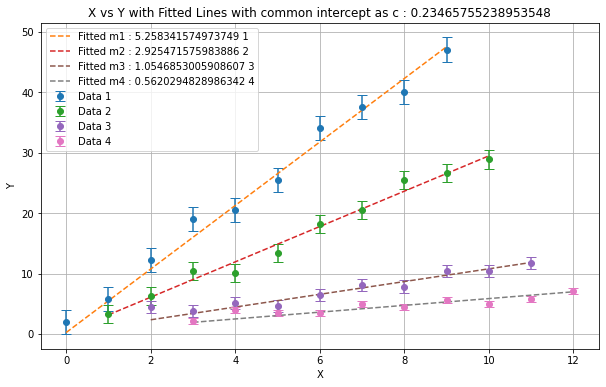

[5.258341574973749, 2.925471575983886, 1.0546853005908607, 0.5620294828986342]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data_with_fitted_lines(x, y, sigma):
    np.random.seed(42)

    y_ij = 0
    for i in range(len(x)):
        for j in range(len(x[i])):
            y_ij += y[i][j]

    # Calculating the Aq factor
    A_q = 0
    for i in range(len(x)):
        sum_xy = 0
        sum_x = 0
        sum_x2 = 0
        for j in range(len(x[i])):
            sum_xy += y[i][j] * x[i][j]
            sum_x += x[i][j]
            sum_x2 += (x[i][j]) ** 2
        A_q += (sum_xy * sum_x) / sum_x2

    # Calculating the Bq factor
    B_q = 0
    for i in range(len(x)):
        sum_x = 0
        sum_x2 = 0
        for j in range(len(x[i])):
            sum_x += x[i][j]
            sum_x2 += (x[i][j]) ** 2
        B_q += ((sum_x) ** 2) / sum_x2

    # Calculating sigma_a
    sigma_a = 0
    for i in range(len(x)):
        sigma_a += sigma[i] ** 2

    # Calculating the intercept coefficient
    c = (y_ij - A_q) / (len(x1)* sigma_a - B_q)

    # Calculating the slopes
    m_values = []
    for i in range(len(x)):
        sum_xy = 0
        sum_x = 0
        sum_x2 = 0
        for j in range(len(x[i])):
            sum_xy += x[i][j] * y[i][j]
            sum_x += x[i][j]
            sum_x2 += x[i][j] ** 2
        m = (sum_xy - c * sum_x) / sum_x2
        m_values.append(m)
    
    errors = np.array([np.std(data - (np.arange(len(data)) + 1)) for data in y])

    plt.figure(figsize=(10, 6))

# Plot with error bars
    for i in range(len(x)):
        plt.errorbar(x[i], y[i], yerr=sigma[i], fmt='o', label=f'Data {i+1}', capsize=5)

        plt.plot(x[i], m_values[i] * x[i] + c, label=f'Fitted m{i + 1} : {m_values[i]} {i + 1}', linestyle='--')
    

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'X vs Y with Fitted Lines with common intercept as c : {c}')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(m_values)

# Example usage:
x1 = np.arange(0, 10)  # Range from 0 to 9
x2 = np.arange(1, 11)  # Range from 1 to 10
x3 = np.arange(2, 12)  # Range from 2 to 11
x4 = np.arange(3, 13)  # Range from 3 to 12
x = np.array([x1, x2, x3, x4])
y = np.array([
    [5 * x1[i] + 1 + np.random.normal(0, 2) for i in range(len(x1))],
    [3 * x2[i] + 1 + np.random.normal(0, 1.5) for i in range(len(x2))],
    [x3[i] + 1 + np.random.normal(0, 1) for i in range(len(x3))],
    [0.5 * x4[i] + 1 + np.random.normal(0, 0.5) for i in range(len(x4))]
])
sigma = np.array([2, 1.5, 1, 0.5])

plot_data_with_fitted_lines(x, y, sigma)


In [3]:
import numpy as np
from scipy.stats import linregress

np.random.seed(42)
# Example data
x1 = np.arange(0, 10)  # Range from 0 to 9
x2 = np.arange(1, 11)  # Range from 1 to 10
x3 = np.arange(2, 12)  # Range from 2 to 11
x4 = np.arange(3, 13)  # Range from 3 to 12
x = np.array([x1, x2, x3, x4])
y = np.array([
    [5 * x1[i] + 1 + np.random.normal(0, 2) for i in range(len(x1))],
    [3 * x2[i] + 1 + np.random.normal(0, 1.5) for i in range(len(x2))],
    [x3[i] + 1 + np.random.normal(0, 1) for i in range(len(x3))],
    [0.5 * x4[i] + 1 + np.random.normal(0, 0.5) for i in range(len(x4))]
])

# Given slopes and intercept
slopes = np.array([5.258341574973749, 2.925471575983886, 1.0546853005908607, 0.5620294828986342])  # Example slopes
intercept = 0.23465  # Example intercept

# Use linregress to calculate slope standard errors
slopes_std_error = []
for i in range(len(x)):
    slope, _, _, _, std_err = linregress(x[i], y[i])
    slopes_std_error.append(std_err / np.std(x[i]))  # Standard error of slope

# Use pre-calculated intercept to calculate standard error of intercept
intercept_residuals = np.concatenate(y) - np.concatenate([slopes[i] * x[i] for i in range(len(x))]) - intercept
num_data_points = np.sum([len(xi) for xi in x])
intercept_std_error = np.sqrt(np.sum(intercept_residuals ** 2) / (num_data_points - 2))

print("Slopes:", slopes)
print("Standard error of slopes:", slopes_std_error)
print("Intercept:", intercept)
print("Standard error of intercept:", intercept_std_error)


Slopes: [5.25834157 2.92547158 1.0546853  0.56202948]
Standard error of slopes: [0.0587643889588144, 0.04530987316339682, 0.031024974963336012, 0.02163428430975542]
Intercept: 0.23465
Standard error of intercept: 1.14920700492448
